In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
df=pd.read_csv(r"C:\Users\mrwiz\Downloads\day.csv")

In [71]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [72]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [74]:
#checking null values
nullvalues=df.isnull().sum()
nullvalues

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [76]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})
df['yr'] = df['yr'].map({0: 2018, 1: 2019}) #Data preparation converting categorical variables, create dummy variables etc

In [77]:
features = df.drop(['casual', 'registered', 'cnt'], axis=1)
target = df['cnt'] #To avoid Multicollinearity

In [78]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [79]:
features = pd.get_dummies(features, drop_first=True) #Create dummy variables

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42) #Split the data

In [81]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)   #Imputing the missing values

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)  #Building and training the model

LinearRegression()

In [83]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}") #Make predictions and evaluate the model

R-squared score: 0.8160243973221772


In [84]:
#Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Residual Plot')

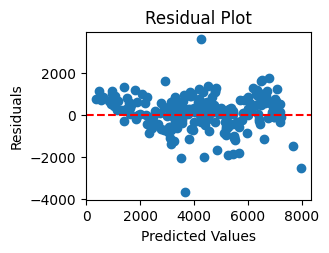

In [85]:
#Residual plot
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Residual Distribution')

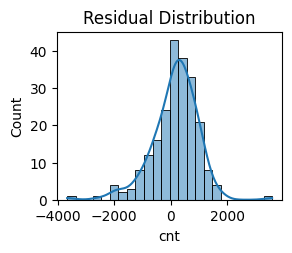

In [86]:
#Q-Q plot
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

Text(0.5, 1.0, 'Homoscedasticity Check')

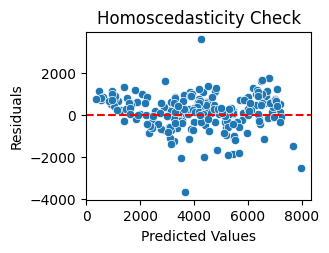

In [87]:
#Homoscedasticity
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')

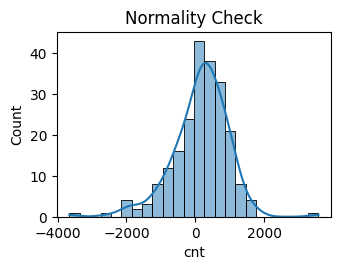

In [88]:
#Normality
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.title('Normality Check')

plt.tight_layout()
plt.show()

In [89]:
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients) #To analyze the coefficients of your model to understand the importance of each feature

                       Coefficient
instant                   5.785161
yr                      -90.249930
mnth                   -189.553426
holiday                -698.935410
weekday                  34.673292
...                            ...
season_spring         -1163.223243
season_summer           259.618206
season_winter           739.528270
weathersit_light_rain -1674.559434
weathersit_mist        -499.187242

[744 rows x 1 columns]
